In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
from math import cos, asin, sqrt, pi
# Input data files are available in the "

In [2]:
earth = 6378
m = (1 / ((2 * math.pi / 360) * earth)) / 1000

In [3]:
data = pd.read_json('amenities-vancouver.json.gz', lines=True)
data = data.drop(['timestamp','tags'], axis=1)
data = data.dropna()
data


,amenity,lat,lon,name
3,cafe,49.260812,-123.125736,Starbucks
4,fast_food,49.260953,-123.125704,Salad Loop
7,place_of_worship,49.370898,-123.280448,St. Monica's Anglican Church
8,fuel,49.207282,-123.140193,Shell
9,cafe,49.204056,-123.134982,Wick's Cafe
15,fast_food,49.279259,-123.107426,Uncle Fatih's Pizza
16,fast_food,49.279350,-123.107836,Freshslice
17,fast_food,49.279113,-123.107422,Something Healthy
18,cafe,49.279937,-123.107356,Starbucks
21,library,49.229499,-123.090399,Vancouver Public Library South Hill Branch


In [4]:
#https://stackoverflow.com/questions/7477003/calculating-new-longitude-latitude-from-old-n-meters
#rand_position_lon = np.random.uniform(data['lon'].min(), data['lon'].max())
#print(rand_position_lon)
#rand_position_lat = np.random.uniform(data['lat'].min(), data['lat'].max())
#print(rand_position_lat)

#x = rand_position_lon + ((5000 * m)/math.cos(rand_position_lat*(math.pi/180)))

#y = rand_position_lat + (5000 * m)  


#x2 = rand_position_lon - ((5000 * m)/math.cos(rand_position_lat*(math.pi/180)))
#y2 = rand_position_lat - (5000 * m)




x = -123.13500846976441 + ((3000 * m)/math.cos(49.18563055292021*(math.pi/180)))

y = 49.18563055292021 + (3000 * m)  


x2 = -123.13500846976441 - ((3000 * m)/math.cos(49.18563055292021*(math.pi/180)))
y2 = 49.18563055292021 - (3000 * m)

print(x)
print(y)
print(x2)
print(y2)

-123.09377590060095
49.21258059032053
-123.17624103892788
49.15868051551989


In [5]:
maxlat = data['lat'].max()
print(maxlat)

minlat = data['lat'].min()
print(minlat)

maxlon = data['lon'].max()
print(maxlon)

minlon = data['lon'].min()
print(minlon)

49.4329887
49.0053233
-122.0016829
-123.4772643


In [6]:
size  = data.loc[data['lon'] < x].reset_index(drop=True)
size = size.loc[size['lon'] > x2].reset_index(drop=True)
size = size.loc[size['lat'] < y].reset_index(drop=True)
size = size.loc[size['lat'] > y2].reset_index(drop=True)
size

,amenity,lat,lon,name
0,fuel,49.207282,-123.140193,Shell
1,cafe,49.204056,-123.134982,Wick's Cafe
2,restaurant,49.171276,-123.134873,Oriental Rice Noodle
3,restaurant,49.172095,-123.133608,Tokyo Joe's
4,car_rental,49.202207,-123.134159,Wicked Camper Van
5,pharmacy,49.170746,-123.137236,London Drugs
6,fuel,49.173315,-123.124982,Shell
7,pub,49.209442,-123.116162,Dublin Crossing Irish Pub
8,fast_food,49.208124,-123.140783,McDonald's
9,restaurant,49.175404,-123.134250,No. 9 Restaurant


In [7]:
graph = size.groupby('amenity').count()
graph = graph.drop(['name','lon'], axis=1)
graph

,lat
amenity,
atm,1
bank,39
bar,6
bureau_de_change,1
bus_station,3
cafe,44
car_rental,4
car_wash,1
cinema,1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text xticklabel objects>)

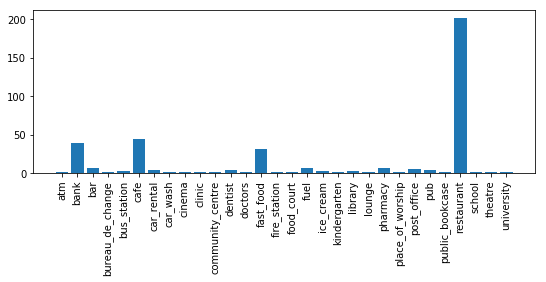

In [8]:
graph2 = graph.rename(columns={"lat":"Count"}).reset_index()
#objects = graph['amenity']
#y_pos = np.arange(len(objects))
#performance = graph['Count']
#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
plt.figure(figsize=(9, 3))
plt.bar(graph2['amenity'],graph2['Count'])
plt.xticks(rotation='vertical')

In [9]:
#M = input('What are you looking for?')
Final = size.loc[size['amenity'] == 'cafe']
output = Final.dropna().reset_index(drop=True)
output

,amenity,lat,lon,name
0,cafe,49.204056,-123.134982,Wick's Cafe
1,cafe,49.197753,-123.140843,Caffè Artigiano
2,cafe,49.179727,-123.137991,Paul's Kitchen
3,cafe,49.178466,-123.130784,Leisure Tea & Coffee
4,cafe,49.186856,-123.106734,Creme de la Crumb
5,cafe,49.210658,-123.116826,CoCo Fresh Tea & Juice
6,cafe,49.212475,-123.140644,Mr. Mustache Bubble Tea
7,cafe,49.212345,-123.140658,Bean Around The World Coffees
8,cafe,49.188694,-123.133063,ZenQ
9,cafe,49.187239,-123.130164,Bubble World


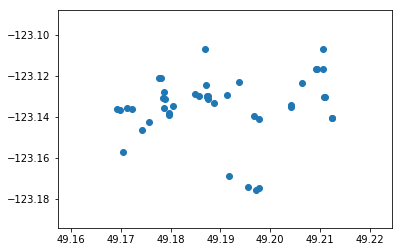

In [10]:
ax1 = plt.scatter(output['lat'],output['lon'])